In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = xr.open_dataset("/glade/campaign/acom/acom-climate/UTLS/shawnh/archive/FCnudged_f09.mam.mar27.2000_2021.002/atm/proc/tseries/month_1/FCnudged_f09.mam.mar27.2000_2021.002.cam.h0.O3.200201-202412.nc")

In [3]:
dataset

<xarray.Dataset> Size: 2GB
Dimensions:       (lat: 192, lon: 288, lev: 32, ilev: 33, time: 276, nbnd: 2)
Coordinates:
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev           (lev) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 264B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) datetime64[ns] 2kB 2002-02-01 2002-03-01 ... 2025-01-01
Dimensions without coordinates: nbnd
Data variables: (12/26)
    gw            (lat) float64 2kB ...
    hyam          (lev) float64 256B ...
    hybm          (lev) float64 256B ...
    P0            float64 8B ...
    hyai          (ilev) float64 264B ...
    hybi          (ilev) float64 264B ...
    ...            ...
    n2ovmr        (time) float64 2kB ...
    f11vmr        (time) float64 2kB ...
    f12vmr        (time) float64 2kB ...
    sol_tsi       (time) float64 2kB ...
    nsteph        (time) int32 1kB ...
    O3            (time, lev, lat, lon) float32 2GB ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FCnudged_f09.mam.mar27.2000_2021.002
    logname:           shawnh
    host:              derecho5
    initial_file:      /glade/campaign/acom/acom-climate/UTLS/shawnh/archive/...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [15]:
print("the thing is" + str(dataset["P0"]))

the thing is<xarray.DataArray 'P0' ()> Size: 8B
array(100000.)
Attributes:
    long_name:  reference pressure
    units:      Pa


In [5]:
start_date = '2002-02-01'
end_date = '2025-01-01'
total_months_available = len(dataset.time)

time_coords = pd.date_range(start=start_date, periods=total_months_available, freq='MS')

ozone = dataset['O3']
ozone = ozone.assign_coords(time=('time', time_coords))
grouped_o3 = ozone.groupby('time.month').mean()

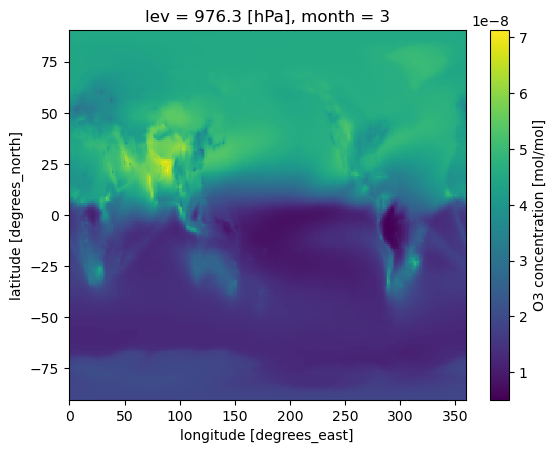

In [6]:
grouped_o3[2][30].plot()

In [7]:
lev_layer = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

tco = 0
for level in lev_layer:
    tco += grouped_o3[1][level]

tco

<xarray.DataArray 'O3' (lat: 192, lon: 288)> Size: 221kB
array([[8.5985062e-07, 8.5985062e-07, 8.5985062e-07, ..., 8.5985062e-07,
        8.5985062e-07, 8.5985062e-07],
       [8.4646416e-07, 8.4685723e-07, 8.4726338e-07, ..., 8.4531968e-07,
        8.4569166e-07, 8.4607819e-07],
       [8.3984617e-07, 8.4058991e-07, 8.4133563e-07, ..., 8.3763132e-07,
        8.3836682e-07, 8.3910652e-07],
       ...,
       [9.0193805e-07, 9.0167333e-07, 9.0141219e-07, ..., 9.0275427e-07,
        9.0248159e-07, 9.0220976e-07],
       [9.0434827e-07, 9.0422003e-07, 9.0408929e-07, ..., 9.0474634e-07,
        9.0461288e-07, 9.0447980e-07],
       [9.0678765e-07, 9.0678770e-07, 9.0678765e-07, ..., 9.0678770e-07,
        9.0678770e-07, 9.0678770e-07]], dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lev      float64 8B 273.9
    month    int64 8B 2

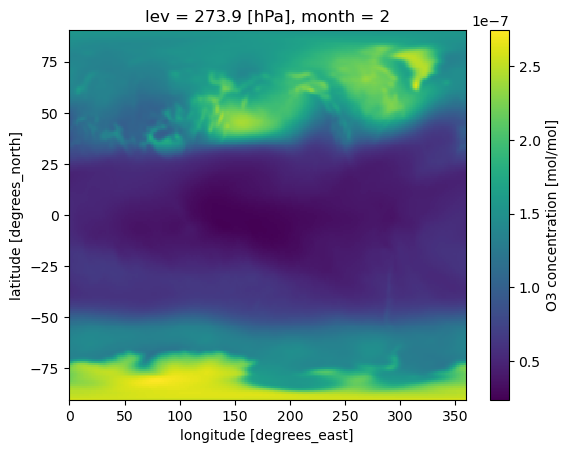

In [8]:
grouped_o3[1][16].plot()

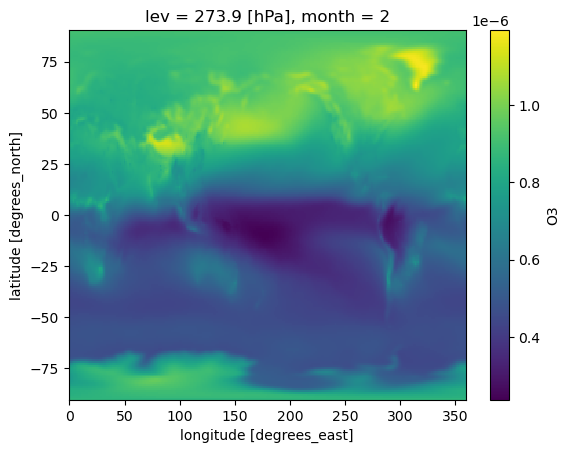

In [9]:
tco.plot()

In [16]:
pdeldry = xr.open_dataset("/glade/campaign/acom/acom-climate/UTLS/shawnh/archive/FCnudged_f09.mam.mar27.2000_2021.002/atm/proc/tseries/month_1/FCnudged_f09.mam.mar27.2000_2021.002.cam.h0.PDELDRY.200201-202412.nc")

In [17]:
pdeldry

<xarray.Dataset> Size: 2GB
Dimensions:       (lat: 192, lon: 288, lev: 32, ilev: 33, time: 276, nbnd: 2)
Coordinates:
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev           (lev) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 264B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) datetime64[ns] 2kB 2002-02-01 2002-03-01 ... 2025-01-01
Dimensions without coordinates: nbnd
Data variables: (12/26)
    gw            (lat) float64 2kB ...
    hyam          (lev) float64 256B ...
    hybm          (lev) float64 256B ...
    P0            float64 8B ...
    hyai          (ilev) float64 264B ...
    hybi          (ilev) float64 264B ...
    ...            ...
    n2ovmr        (time) float64 2kB ...
    f11vmr        (time) float64 2kB ...
    f12vmr        (time) float64 2kB ...
    sol_tsi       (time) float64 2kB ...
    nsteph        (time) int32 1kB ...
    PDELDRY       (time, lev, lat, lon) float32 2GB ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FCnudged_f09.mam.mar27.2000_2021.002
    logname:           shawnh
    host:              derecho5
    initial_file:      /glade/campaign/acom/acom-climate/UTLS/shawnh/archive/...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

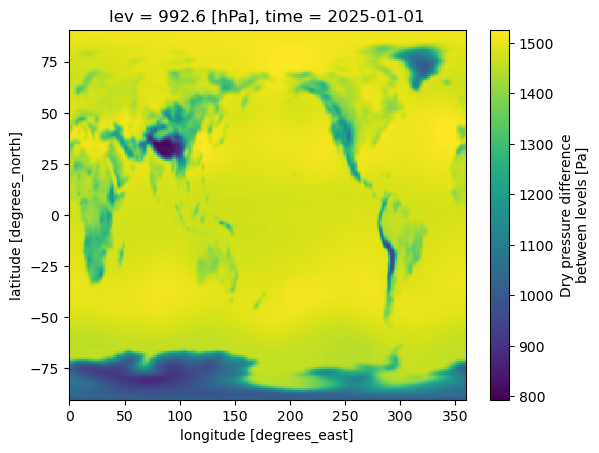

In [30]:
pdeldry["PDELDRY"][275][31].plot()

In [36]:
dataset["P0"].shape

()

In [37]:
dataset["hybm"].shape

(32,)